In [1]:
import radarsimpy

print("`RadarSimPy` used in this example is version: " + str(radarsimpy.__version__))

`RadarSimPy` used in this example is version: 12.3.0


# Interferometric Radar

## Introduction

Within radar technology, interferometry encompasses a range of measurement methods wherein the assessment hinges upon the phase shift within the received signal. Particularly, interferometric radar has demonstrated its utility in capturing minuscule vital signs. An interferometric radar designed for monitoring slight vital signs stands as an exemplar of cutting-edge technology. This innovative approach enables the non-invasive and meticulous tracking of essential metrics like heart rate and respiration, all achieved through a contactless methodology. By synergizing radar's sensitivity to even the faintest motions with interferometry's precision in gauging phase discrepancies, this technology showcases a remarkable advancement.

Interferometric radar operates by emitting electromagnetic waves, usually in the microwave frequency range, towards a target area where a person is located. These waves then reflect off the person's body and return to the radar sensor. As the person's body moves due to vital functions like breathing and heartbeat, the reflected waves undergo frequency and phase shifts, which are proportional to these movements.

By carefully analyzing the phase differences between the emitted and received signals, the radar system can extract information about the person's vital signs. This technology is incredibly sensitive, allowing it to detect even the slightest movements associated with breathing and heartbeat. Since it operates from a distance, it offers a non-invasive and unobtrusive method of monitoring vital signs, making it suitable for various applications, including healthcare, wellness monitoring, and security.

For illustrative purposes, consider the use of [`RadarSimPy`](https://radarsimx.com/radarsimx/radarsimpy/) to simulate an interferometric radar scenario. In this simulation, the radar acts as a measurement tool for capturing the minute motion of an ideal point target.

## Create Radar Model

Firstly, import the required modules from `radarsimpy`. `numpy` will also be needed in this example.


In [2]:
import numpy as np
from radarsimpy import Radar, Transmitter, Receiver

### Transmitter

For this interferometric radar, it will transmit a 24.125 GHz single-tone signal, and the pulse length will be 20 seconds. It has only 1 channel, which is located at [0, 0, 0] m.


In [3]:
tx = Transmitter(
    f=24.125e9, t=20, tx_power=10, pulses=1, channels=[dict(location=(0, 0, 0))]
)

### Receiver

On the receier side, its sampling rate is 20 sps.


In [4]:
rx = Receiver(
    fs=20,
    noise_figure=12,
    rf_gain=20,
    baseband_gain=50,
    load_resistor=1000,
    channels=[dict(location=(0, 0, 0))],
)

### Radar System

Use the defined transmitter and receiver to create the radar system.


In [5]:
radar = Radar(transmitter=tx, receiver=rx)

### Target

`RadarSimPy` supports the defination of a target's position at timestamp basis. Sepecifically, you can define the location of the target at each sampling time instance. For example, the `x` position of the target is defined as `1.4+1e-3*np.sin(2*np.pi*1*radar.timestamp)` in this example, where `radar.timestamp` is the timestamp matrix of the baseband samples. The target is having a sinusoidal motion at `x` axis with a frequency of 1 Hz.


In [6]:
target = dict(
    location=(1.4 + 1e-3 * np.sin(2 * np.pi * 1 * radar.time_prop["timestamp"]), 0, 0),
    rcs=-10,
    phase=0,
)

targets = [target]

## Simulate Baseband Signals

Use the `simulator.simc` module to simulate the baseband samples from the defined radar system and targets.

The output baseband data is a dict including the timestamp and baseband. Both of them are 3-D matrix:

`[channels, pulses, ADC samples]`


In [7]:
from radarsimpy.simulator import simc

data = simc(radar, targets)
timestamp = data["timestamp"]
baseband = data["baseband"]

_Plot the baseband_


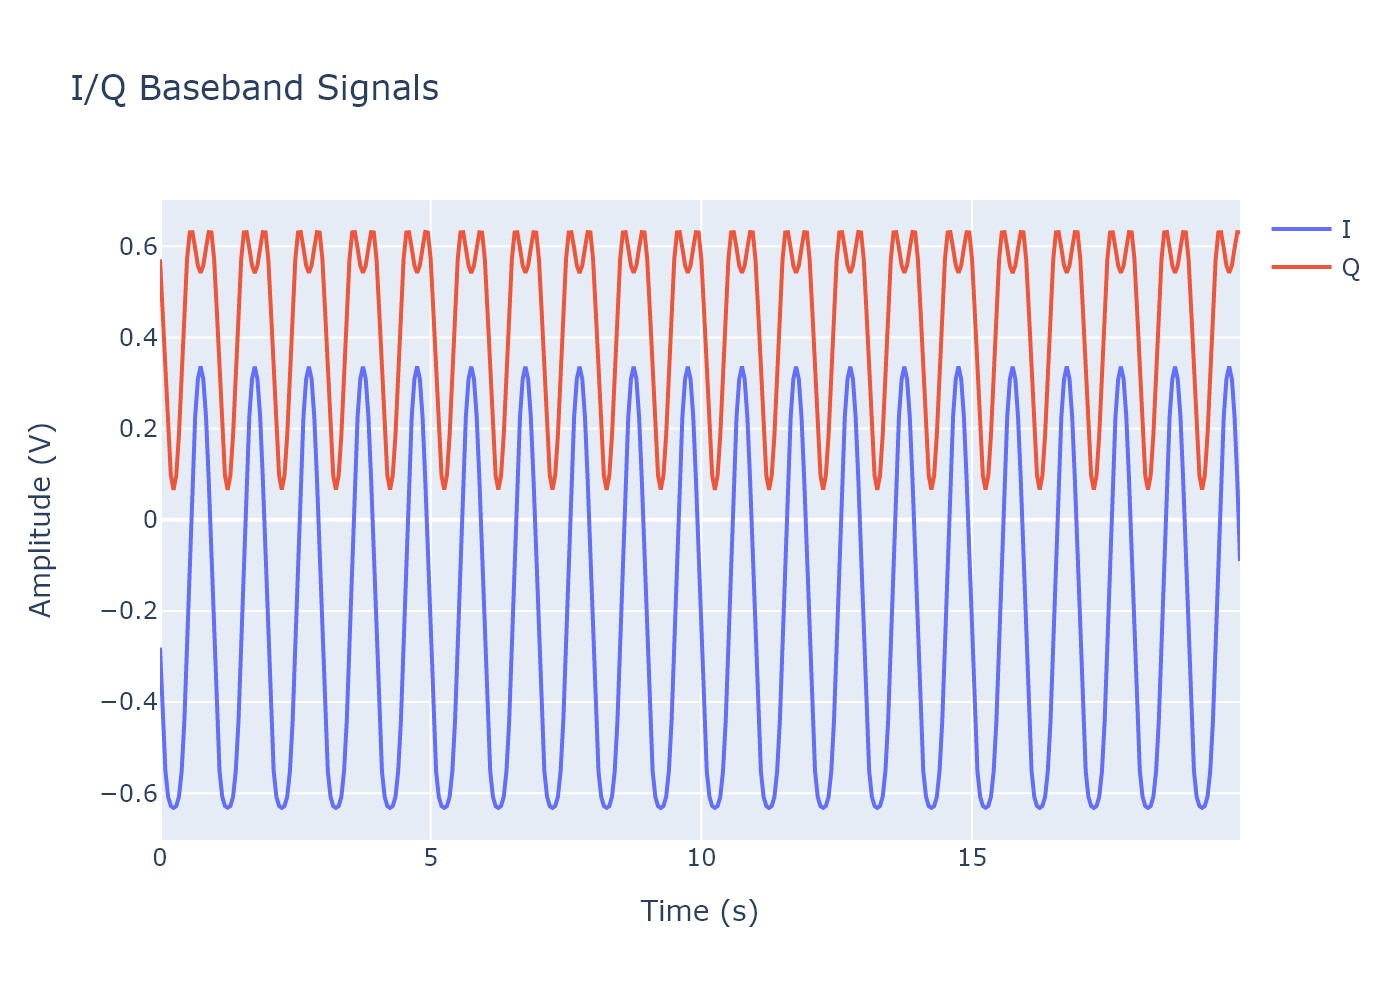

In [8]:
import plotly.graph_objs as go
from IPython.display import Image

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=timestamp[0, 0, :],
        y=np.real(baseband[0, 0, :]),
        name="I",
    )
)
fig.add_trace(
    go.Scatter(
        x=timestamp[0, 0, :],
        y=np.imag(baseband[0, 0, :]),
        name="Q",
    )
)

fig.update_layout(
    title="I/Q Baseband Signals",
    yaxis=dict(title="Amplitude (V)"),
    xaxis=dict(title="Time (s)"),
)

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))

_Plot the I/Q constellation figure_


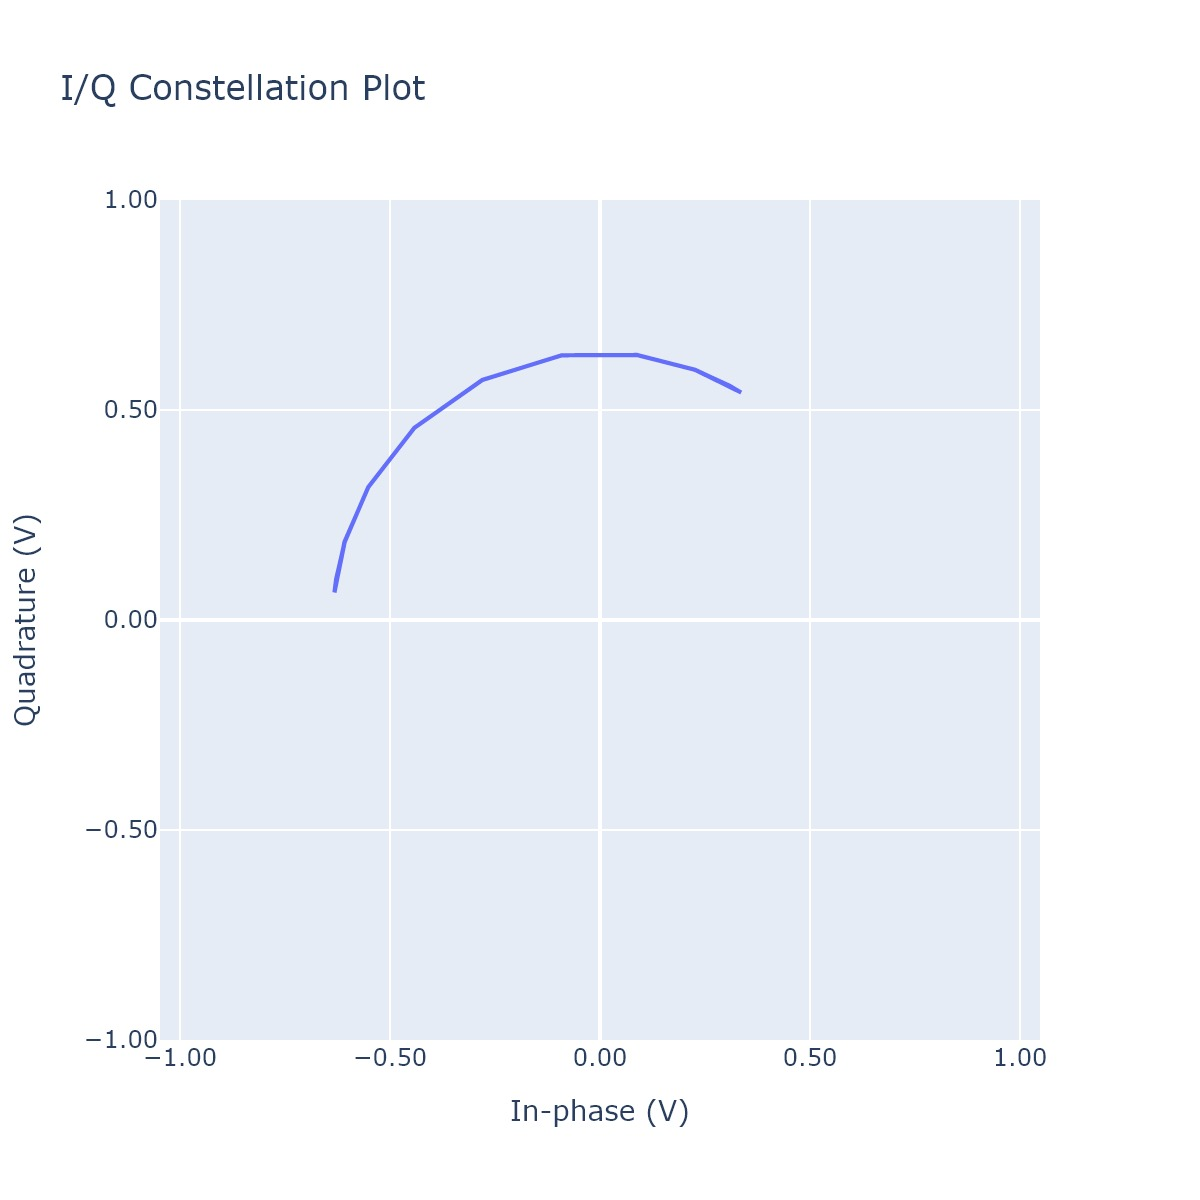

In [9]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=np.real(baseband[0, 0, :]),
        y=np.imag(baseband[0, 0, :]),
    )
)

fig.update_layout(
    title="I/Q Constellation Plot",
    xaxis=dict(range=[-1, 1], tickformat=".2f", title="In-phase (V)"),
    yaxis=dict(
        range=[-1, 1],
        tickformat=".2f",
        title="Quadrature (V)",
        scaleanchor="x",
        scaleratio=1,
    ),
    height=600,
    width=600,
)

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))

## Phase demodulation

The demodulation of the target's motion phase involves calculating the angle of the I/Q baseband signal. Evidently, the target's phase forms a sinusoidal signal at 1 Hz frequency, directly mirroring its motion patterns.


In [10]:
demod = np.angle(baseband[0, 0, :])

_Plot_


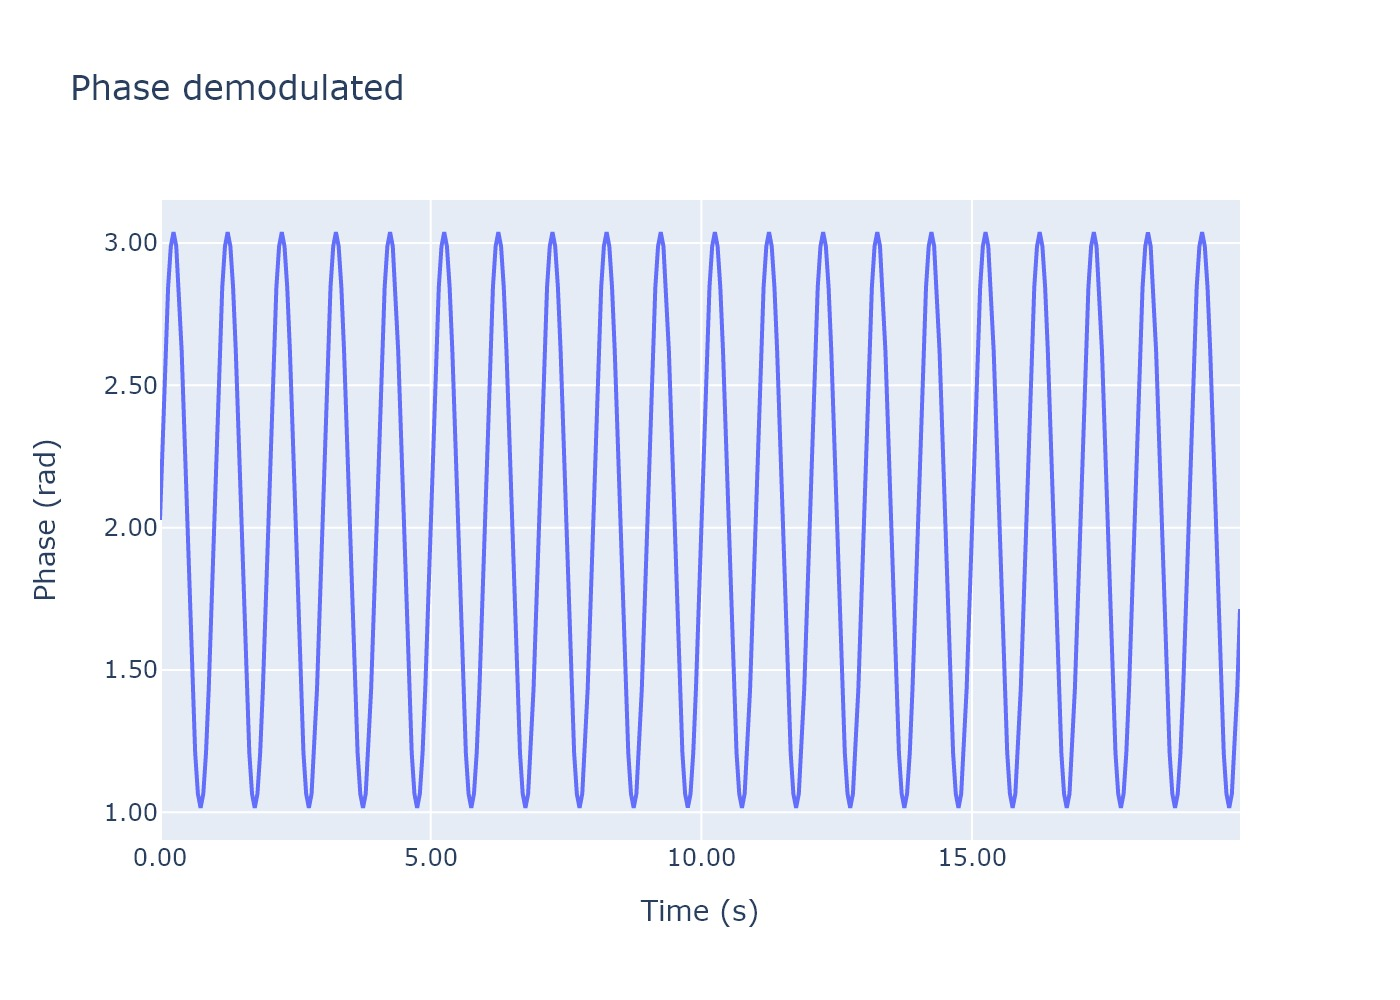

In [11]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=timestamp[0, 0, :],
        y=demod,
    )
)
fig.update_layout(
    title="Phase demodulated",
    xaxis=dict(tickformat=".2f", title="Time (s)"),
    yaxis=dict(tickformat=".2f", title="Phase (rad)"),
)

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))